In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [2]:
# Create a path
path = r'C:\Users\Asus-Pc\Desktop\CareerFoundry\Machine Learning with Python'

In [3]:
# Import cleaned dataset
df_cleaned = pd.read_csv(os.path.join(path, 'df_cleaned.csv'), index_col = False)
df_cleaned

Unnamed: 0  BASEL_cloud_cover  STOCKHOLM_humidity  MUNCHENB_pressure  \
0               0                  7                0.98             1.0304   
1               1                  6                0.62             1.0292   
2               2                  8                0.69             1.0320   
3               3                  3                0.98             1.0443   
4               4                  6                0.96             1.0430   
...           ...                ...                 ...                ...   
22945       22945                  1                0.98             1.0263   
22946       22946                  6                1.00             1.0263   
22947       22947                  4                0.85             1.0263   
22948       22948                  5                0.94             1.0263   
22949       22949                  5                0.97             1.0263   

       KASSEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0                       8            0.85          1.0180   
1                       6            0.84          1.0180   
2                       8            0.90          1.0180   
3                       6            0.92          1.0180   
4                       7            0.95          1.0180   
...                   ...             ...             ...   
22945                   4            0.79          1.0248   
22946                   3            0.77          1.0244   
22947                   3            0.76          1.0227   
22948                   3            0.80          1.0212   
22949                   3            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  ...  \
0                        0.32                 0.09             0.7  ...   
1                        0.36                 1.05             1.1  ...   
2                        0.18                 0.30             0.0  ...   
3                        0.58                 0.00             4.1  ...   
4                        0.65                 0.14             5.4  ...   
...                       ...                  ...             ...  ...   
22945                    1.34                 0.22             7.7  ...   
22946                    1.34                 0.22             5.4  ...   
22947                    1.34                 0.22             6.1  ...   
22948                    1.34                 0.22             5.8  ...   
22949                    1.34                 0.22             3.2  ...   

       STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0                     4.9                     5               0.88   
1                     5.0                     7               0.91   
2                     4.1                     7               0.91   
3                     2.3                     7               0.86   
4                     4.3                     3               0.80   
...                   ...                   ...                ...   
22945                14.2                     5               0.82   
22946                14.3                     5               0.82   
22947                14.4                     5               0.82   
22948                12.4                     5               0.82   
22949                12.6                     5               0.82   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                 1.0003                       0.45                    0.34   
1                 1.0007                       0.25                    0.84   
2                 1.0096                       0.17                    0.08   
3                 1.0184                       0.13                    0.98   
4                 1.0328                       0.46                    0.00   
...                  ...                        ...                     ...   
22945             1.0142      

In [4]:
# Import weather dataset
df_weather = pd.read_csv(os.path.join(path, 'Weather_dataset.csv'), index_col = False)
df_weather

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

In [5]:
# Drop unnecessary columns
df_cleaned = df_cleaned.drop(['Unnamed: 0'], axis=1)

In [6]:
# Copy 'DATE' column from unscaled dataset to clean one
df_cleaned['DATE'] = df_weather['DATE']

In [7]:
#Reduce cleaned dataset to a decade (1980s)
df_80s = df_cleaned[df_cleaned['DATE'].astype(str).str.contains('198')] 
df_80s

BASEL_cloud_cover  STOCKHOLM_humidity  MUNCHENB_pressure  \
7305                   6                0.64             1.0276   
7306                   5                0.55             1.0333   
7307                   8                0.68             1.0415   
7308                   8                0.69             1.0396   
7309                   8                0.72             1.0273   
...                  ...                 ...                ...   
10953                  6                0.93             1.0264   
10954                  3                0.83             1.0298   
10955                  4                0.83             1.0361   
10956                  0                0.80             1.0343   
10957                  0                0.73             1.0322   

       KASSEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
7305                    3            0.83          1.0180   
7306                    3            0.84          1.0180   
7307                    1            0.80          1.0180   
7308                    2            0.94          1.0180   
7309                    7            0.90          1.0180   
...                   ...             ...             ...   
10953                   7            0.87          1.0157   
10954                   3            0.84          1.0196   
10955                   2            0.85          1.0224   
10956                   8            0.83          1.0233   
10957                   8            0.83          1.0225   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
7305                     0.40                 0.01             1.6   
7306                     0.34                 0.09             0.9   
7307                     0.44                 0.07             2.0   
7308                     0.18                 0.43             0.0   
7309                     0.25                 0.26             0.2   
...                       ...                  ...             ...   
10953                    0.49                 0.00             4.0   
10954                    0.54                 0.00             6.4   
10955                    0.52                 0.00             5.5   
10956                    0.57                 0.00             6.6   
10957                    0.58                 0.00             6.7   

       BASEL_temp_mean  ...  VALENTIA_cloud_cover  VALENTIA_humidity  \
7305              -0.8  ...                     6               0.90   
7306              -1.7  ...                     7               0.89   
7307              -0.6  ...                     8               0.95   
7308              -0.9  ...                     5               0.80   
7309               3.0  ...                     7               0.79   
...                ...  ...                   ...                ...   
10953             -0.9  ...                     6               0.79   
10954             -1.1  ...                     8               0.84   
10955             -1.7  ...                     8               0.86   
10956             -2.1  ...                     8               0.84   
10957             -2.2  ...                     8               0.90   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
7305              1.0130                       0.17                    0.05   
7306              1.0195                       0.12                    1.48   
7307              1.0058                       0.13                    0.60   
7308              1.0034                       0.30                    0.50   
7309              1.0134                       0.22                    0.03   
...                  ...                        ...                     ...   
10953             1.0105                       0.22                    0.12   
10954             1.0134                       0.18                    0.05   
10955             1.0110                       0.12 

In [8]:
# Drop unnecessary columns
df_80s = df_80s.drop(['DATE'], axis=1)
df_80s

BASEL_cloud_cover  STOCKHOLM_humidity  MUNCHENB_pressure  \
7305                   6                0.64             1.0276   
7306                   5                0.55             1.0333   
7307                   8                0.68             1.0415   
7308                   8                0.69             1.0396   
7309                   8                0.72             1.0273   
...                  ...                 ...                ...   
10953                  6                0.93             1.0264   
10954                  3                0.83             1.0298   
10955                  4                0.83             1.0361   
10956                  0                0.80             1.0343   
10957                  0                0.73             1.0322   

       KASSEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
7305                    3            0.83          1.0180   
7306                    3            0.84          1.0180   
7307                    1            0.80          1.0180   
7308                    2            0.94          1.0180   
7309                    7            0.90          1.0180   
...                   ...             ...             ...   
10953                   7            0.87          1.0157   
10954                   3            0.84          1.0196   
10955                   2            0.85          1.0224   
10956                   8            0.83          1.0233   
10957                   8            0.83          1.0225   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
7305                     0.40                 0.01             1.6   
7306                     0.34                 0.09             0.9   
7307                     0.44                 0.07             2.0   
7308                     0.18                 0.43             0.0   
7309                     0.25                 0.26             0.2   
...                       ...                  ...             ...   
10953                    0.49                 0.00             4.0   
10954                    0.54                 0.00             6.4   
10955                    0.52                 0.00             5.5   
10956                    0.57                 0.00             6.6   
10957                    0.58                 0.00             6.7   

       BASEL_temp_mean  ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  \
7305              -0.8  ...                 1.1                     6   
7306              -1.7  ...                -1.2                     7   
7307              -0.6  ...                -5.0                     8   
7308              -0.9  ...                -5.4                     5   
7309               3.0  ...                 0.2                     7   
...                ...  ...                 ...                   ...   
10953             -0.9  ...                 4.0                     6   
10954             -1.1  ...                 2.2                     8   
10955             -1.7  ...                 0.4                     8   
10956             -2.1  ...                -0.5                     8   
10957             -2.2  ...                 0.8                     8   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
7305                0.90             1.0130                       0.17   
7306                0.89             1.0195                       0.12   
7307                0.95             1.0058                       0.13   
7308                0.80             1.0034                       0.30   
7309                0.79             1.0134                       0.22   
...                  ...                ...                        ...   
10953               0.79             1.0105                       0.22   
10954               0.84             1.0134                       0.18   
10955               0.86             1.0110                       0.12   
10956      

In [9]:
#Reduce weather dataset to a decade (1980s)
df_80s_weather = df_weather[df_weather['DATE'].astype(str).str.contains('198')] 
df_80s_weather

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
7305   19800101                       0                          0   
7306   19800102                       0                          0   
7307   19800103                       0                          0   
7308   19800104                       0                          0   
7309   19800105                       0                          0   
...         ...                     ...                        ...   
10953  19891227                       0                          0   
10954  19891228                       0                          0   
10955  19891229                       0                          0   
10956  19891230                       0                          0   
10957  19891231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
7305                           0                        0   
7306                           0                        0   
7307                           0                        0   
7308                           0                        0   
7309                           0                        0   
...                          ...                      ...   
10953                          0                        0   
10954                          0                        0   
10955                          0                        0   
10956                          0                        0   
10957                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
7305                             0                          0   
7306                             0                          0   
7307                             0                          0   
7308                             0                          0   
7309                             0                          0   
...                            ...                        ...   
10953                            0                          0   
10954                            0                          0   
10955                            0                          0   
10956                            0                          0   
10957                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
7305                         0                           0   
7306                         0                           0   
7307                         0                           0   
7308                         0                           0   
7309                         0                           0   
...                        ...                         ...   
10953                        0                           0   
10954                        0                           0   
10955                        0                           0   
10956                        0                           0   
10957                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
7305                             0                        0   
7306                             0                        0   
7307                             0                        0   
7308                             0                        0   
7309                             0                        0   
...                            ...                      ...   
10953                            0                        0   
10954                            0                        0   
10955                            0                        0   
10956                            0                        0   
10957                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
7305                           0                      0   
7306                           0    

In [10]:
# Drop unnecessary columns
df_80s_weather = df_80s_weather.drop(['DATE'], axis=1)
df_80s_weather

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
7305                        0                          0   
7306                        0                          0   
7307                        0                          0   
7308                        0                          0   
7309                        0                          0   
...                       ...                        ...   
10953                       0                          0   
10954                       0                          0   
10955                       0                          0   
10956                       0                          0   
10957                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
7305                           0                        0   
7306                           0                        0   
7307                           0                        0   
7308                           0                        0   
7309                           0                        0   
...                          ...                      ...   
10953                          0                        0   
10954                          0                        0   
10955                          0                        0   
10956                          0                        0   
10957                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
7305                             0                          0   
7306                             0                          0   
7307                             0                          0   
7308                             0                          0   
7309                             0                          0   
...                            ...                        ...   
10953                            0                          0   
10954                            0                          0   
10955                            0                          0   
10956                            0                          0   
10957                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
7305                         0                           0   
7306                         0                           0   
7307                         0                           0   
7308                         0                           0   
7309                         0                           0   
...                        ...                         ...   
10953                        0                           0   
10954                        0                           0   
10955                        0                           0   
10956                        0                           0   
10957                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
7305                             0                        0   
7306                             0                        0   
7307                             0                        0   
7308                             0                        0   
7309                             0                        0   
...                            ...                      ...   
10953                            0                        0   
10954                            0                        0   
10955                            0                        0   
10956                            0                        0   
10957                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
7305                           0                      0   
7306                           0                      0   
7307                           0                      0   
7308                           0  

In [12]:
tf.random.set_seed(42)

In [13]:
X = df_80s
y = df_80s_weather
X

BASEL_cloud_cover  STOCKHOLM_humidity  MUNCHENB_pressure  \
7305                   6                0.64             1.0276   
7306                   5                0.55             1.0333   
7307                   8                0.68             1.0415   
7308                   8                0.69             1.0396   
7309                   8                0.72             1.0273   
...                  ...                 ...                ...   
10953                  6                0.93             1.0264   
10954                  3                0.83             1.0298   
10955                  4                0.83             1.0361   
10956                  0                0.80             1.0343   
10957                  0                0.73             1.0322   

       KASSEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
7305                    3            0.83          1.0180   
7306                    3            0.84          1.0180   
7307                    1            0.80          1.0180   
7308                    2            0.94          1.0180   
7309                    7            0.90          1.0180   
...                   ...             ...             ...   
10953                   7            0.87          1.0157   
10954                   3            0.84          1.0196   
10955                   2            0.85          1.0224   
10956                   8            0.83          1.0233   
10957                   8            0.83          1.0225   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
7305                     0.40                 0.01             1.6   
7306                     0.34                 0.09             0.9   
7307                     0.44                 0.07             2.0   
7308                     0.18                 0.43             0.0   
7309                     0.25                 0.26             0.2   
...                       ...                  ...             ...   
10953                    0.49                 0.00             4.0   
10954                    0.54                 0.00             6.4   
10955                    0.52                 0.00             5.5   
10956                    0.57                 0.00             6.6   
10957                    0.58                 0.00             6.7   

       BASEL_temp_mean  ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  \
7305              -0.8  ...                 1.1                     6   
7306              -1.7  ...                -1.2                     7   
7307              -0.6  ...                -5.0                     8   
7308              -0.9  ...                -5.4                     5   
7309               3.0  ...                 0.2                     7   
...                ...  ...                 ...                   ...   
10953             -0.9  ...                 4.0                     6   
10954             -1.1  ...                 2.2                     8   
10955             -1.7  ...                 0.4                     8   
10956             -2.1  ...                -0.5                     8   
10957             -2.2  ...                 0.8                     8   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
7305                0.90             1.0130                       0.17   
7306                0.89             1.0195                       0.12   
7307                0.95             1.0058                       0.13   
7308                0.80             1.0034                       0.30   
7309                0.79             1.0134                       0.22   
...                  ...                ...                        ...   
10953               0.79             1.0105                       0.22   
10954               0.84             1.0134                       0.18   
10955               0.86             1.0110                       0.12   
10956      

In [14]:
print(X.shape)
print(y.shape)

(3653, 135)
(3653, 15)


In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## All weather stations in the 1980s

### Grid Search

In [18]:
# creating a RF classifier
clf = RandomForestClassifier()

In [19]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [20]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\Asus-Pc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus-Pc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus-Pc\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\Asus-Pc\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Asus-Pc\anaconda3\Li

Search took 11.09567811091741 minutes


In [21]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.5485968514715949


### Random Search

In [22]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [23]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [24]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 29.84666556119919 minutes


In [25]:
# random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 70, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 410}
Best RANDOM search score is: 0.5393566050650239


In [26]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.5485968514715949
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 70, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 410}
Best RANDOM search score is: 0.5393566050650239


In [18]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 410, max_depth= 70, max_features=7, min_samples_leaf=1, min_samples_split=2, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, max_features=7, n_estimators=410)

In [19]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5444596443228454


In [20]:
pred = ['Bad weather','Good weather']

[Text(0.39198043474201943, 0.9782608695652174, 'x[11] <= 18.35\ngini = 0.299\nsamples = 1850\nvalue = [[2322, 600]\n[1990, 932]\n[2016, 906]\n[2390, 532]\n[2355, 567]\n[2350, 572]\n[2392, 530]\n[2161, 761]\n[2403, 519]\n[1636, 1286]\n[2371, 551]\n[2521, 401]\n[2922, 0]\n[2480, 442]\n[2762, 160]]'),
 Text(0.1488498634346193, 0.9347826086956522, 'x[72] <= 6.15\ngini = 0.094\nsamples = 1225\nvalue = [[1916, 21]\n[1679, 258]\n[1730, 207]\n[1884, 53]\n[1873, 64]\n[1845, 92]\n[1909, 28]\n[1805, 132]\n[1903, 34]\n[1441, 496]\n[1901, 36]\n[1878, 59]\n[1937, 0]\n[1866, 71]\n[1911, 26]]'),
 Text(0.0645698190508706, 0.8913043478260869, 'x[80] <= 13.45\ngini = 0.036\nsamples = 906\nvalue = [[1429, 11]\n[1393, 47]\n[1409, 31]\n[1430, 10]\n[1426, 14]\n[1419, 21]\n[1434, 6]\n[1412, 28]\n[1427, 13]\n[1248, 192]\n[1431, 9]\n[1431, 9]\n[1440, 0]\n[1432, 8]\n[1426, 14]]'),
 Text(0.033543871628542166, 0.8478260869565217, 'x[18] <= 7.85\ngini = 0.029\nsamples = 898\nvalue = [[1412, 10]\n[1379, 43]\n[1395, 

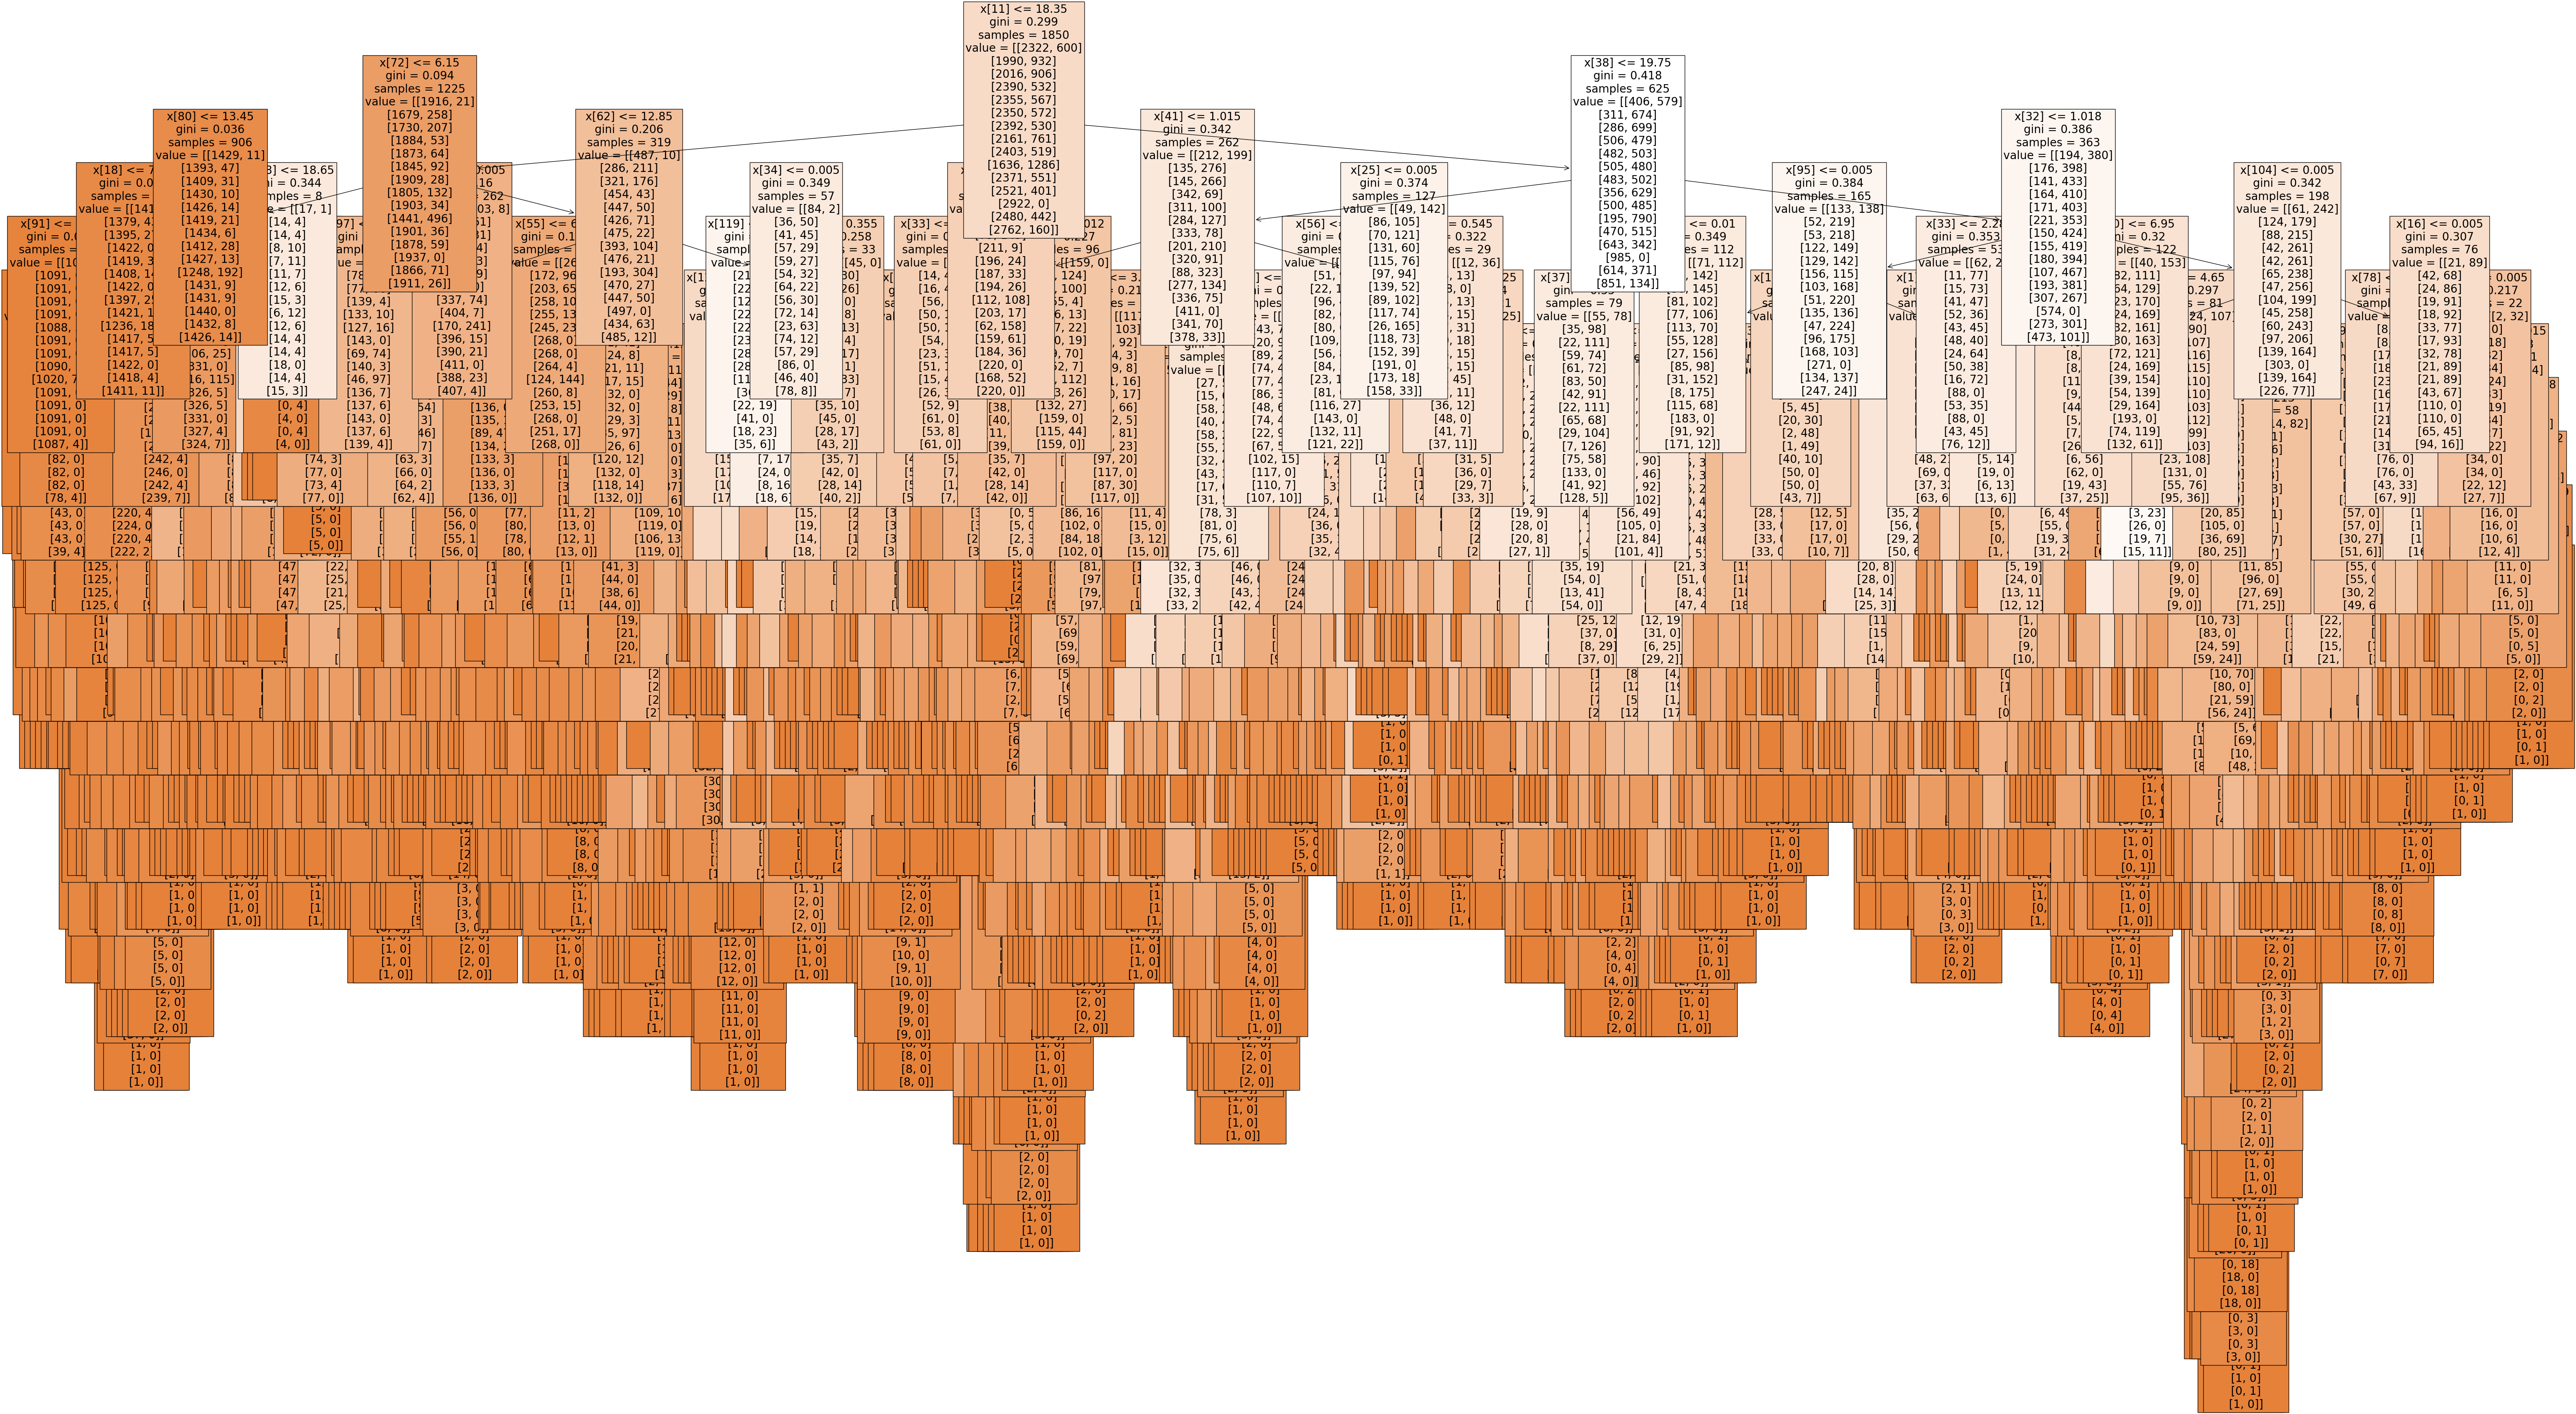

In [22]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=pred, filled=True)

In [23]:
fig.savefig(f"{path}/decision_tree1.png")

In [25]:
np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.00341562, 0.00306892, 0.00370166, 0.00275051, 0.00338435,
       0.00319033, 0.00528102, 0.01067281, 0.00612167, 0.03070959,
       0.00827857, 0.0245654 , 0.00351759, 0.00350983, 0.00386552,
       0.00465436, 0.01184771, 0.00479956, 0.0083095 , 0.00659874,
       0.00996328, 0.0032485 , 0.00348662, 0.00329509, 0.00500397,
       0.01014653, 0.0046342 , 0.01212829, 0.00507698, 0.01236867,
       0.00296348, 0.00319701, 0.00570361, 0.00503676, 0.01163175,
       0.00504343, 0.01313421, 0.00344055, 0.02937795, 0.00402922,
       0.00352468, 0.00490466, 0.00561386, 0.01515511, 0.00630617,
       0.02151388, 0.00433841, 0.02503172, 0.00235559, 0.00393932,
       0.00472918, 0.00451387, 0.00635145, 0.0037863 , 0.01390106,
       0.00373673, 0.01609527, 0.00365781, 0.00523378, 0.00549391,
       0.00935996, 0.00502281, 0.02138494, 0.00426068, 0.01782387,
       0.00289474, 0.00328263, 0.00372791, 0.00411937, 0.01166807,
       0.00467007, 0.01429095, 0.0048107 , 0.01383303, 0.00568

In [26]:
np.set_printoptions(threshold=1000)

In [27]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00341562, 0.00306892, 0.00370166, 0.00275051, 0.00338435,
         0.00319033, 0.00528102, 0.01067281, 0.00612167],
        [0.03070959, 0.00827857, 0.0245654 , 0.00351759, 0.00350983,
         0.00386552, 0.00465436, 0.01184771, 0.00479956],
        [0.0083095 , 0.00659874, 0.00996328, 0.0032485 , 0.00348662,
         0.00329509, 0.00500397, 0.01014653, 0.0046342 ],
        [0.01212829, 0.00507698, 0.01236867, 0.00296348, 0.00319701,
         0.00570361, 0.00503676, 0.01163175, 0.00504343],
        [0.01313421, 0.00344055, 0.02937795, 0.00402922, 0.00352468,
         0.00490466, 0.00561386, 0.01515511, 0.00630617],
        [0.02151388, 0.00433841, 0.02503172, 0.00235559, 0.00393932,
         0.00472918, 0.00451387, 0.00635145, 0.0037863 ],
        [0.01390106, 0.00373673, 0.01609527, 0.00365781, 0.00523378,
         0.00549391, 0.00935996, 0.00502281, 0.02138494],
        [0.00426068, 0.01782387, 0.00289474, 0.00328263, 0.00372791,
         0.00411937, 0.01166807, 0.0046700

In [28]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.04158688, 0.09574812, 0.05468644, 0.06314998, 0.08548641,
       0.07655972, 0.08388627, 0.06673828, 0.08485207, 0.07324575,
       0.07332002, 0.05800973, 0.04993982, 0.05353077, 0.03925974])

In [29]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [30]:
important = pd.Series(sumarray, index = weather_stations) #.sort_values(ascending = False)
important

BASEL         0.041587
BELGRADE      0.095748
BUDAPEST      0.054686
DEBILT        0.063150
DUSSELDORF    0.085486
HEATHROW      0.076560
KASSEL        0.083886
LJUBLJANA     0.066738
MAASTRICHT    0.084852
MADRID        0.073246
MUNCHENB      0.073320
OSLO          0.058010
SONNBLICK     0.049940
STOCKHOLM     0.053531
VALENTIA      0.039260
dtype: float64

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


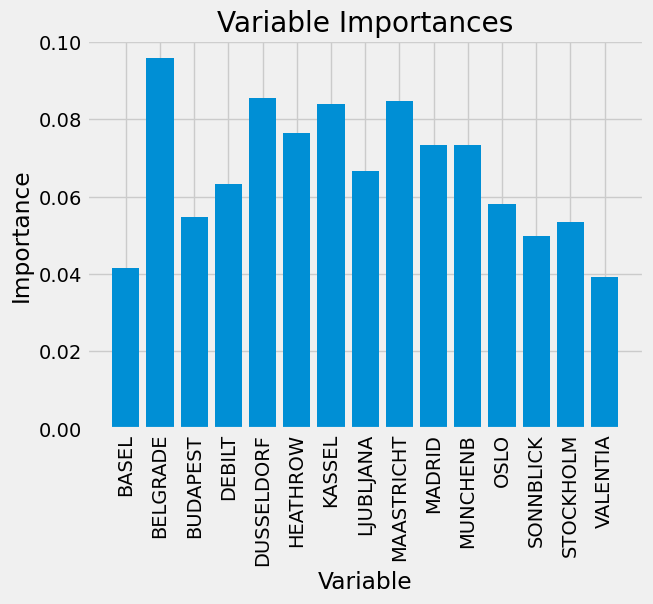

In [31]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(weather_stations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, weather_stations, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#### With this model, the top 3 weather stations in the 80s, regarding importance, are Belgrade, Dusseldorf and Maastricht

## Only Belgrade weather station for all years

In [7]:
# Choose data only for Belgrade 
df_Belgrade = df_weather['BELGRADE_pleasant_weather']
df_Belgrade

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: BELGRADE_pleasant_weather, Length: 22950, dtype: int64

In [8]:
# Drop unnecessary columns
df_cleaned = df_cleaned.drop(['DATE'], axis=1)
df_cleaned

BASEL_cloud_cover  STOCKHOLM_humidity  MUNCHENB_pressure  \
0                      7                0.98             1.0304   
1                      6                0.62             1.0292   
2                      8                0.69             1.0320   
3                      3                0.98             1.0443   
4                      6                0.96             1.0430   
...                  ...                 ...                ...   
22945                  1                0.98             1.0263   
22946                  6                1.00             1.0263   
22947                  4                0.85             1.0263   
22948                  5                0.94             1.0263   
22949                  5                0.97             1.0263   

       KASSEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0                       8            0.85          1.0180   
1                       6            0.84          1.0180   
2                       8            0.90          1.0180   
3                       6            0.92          1.0180   
4                       7            0.95          1.0180   
...                   ...             ...             ...   
22945                   4            0.79          1.0248   
22946                   3            0.77          1.0244   
22947                   3            0.76          1.0227   
22948                   3            0.80          1.0212   
22949                   3            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  \
0                  6.5  ...                 4.9                     5   
1                  6.1  ...                 5.0                     7   
2                  8.5  ...                 4.1                     7   
3                  6.3  ...                 2.3                     7   
4                  3.0  ...                 4.3                     3   
...                ...  ...                 ...                   ...   
22945             15.9  ...                14.2                     5   
22946             16.7  ...                14.3                     5   
22947             16.7  ...                14.4                     5   
22948             15.4  ...                12.4                     5   
22949             13.5  ...                12.6                     5   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0                   0.88             1.0003                       0.45   
1                   0.91             1.0007                       0.25   
2                   0.91             1.0096                       0.17   
3                   0.86             1.0184                       0.13   
4                   0.80             1.0328                       0.46   
...                  ...                ...                        ...   
22945               0.82             1.0142                       1.13   
22946               0.82             1.0142                       1.13   
22947               0.82             1.0142                       1.13   
22948      

In [9]:
tf.random.set_seed(42)

In [10]:
Belgrade_columns = ['BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max']

In [11]:
X = df_cleaned[Belgrade_columns]
y = df_Belgrade
X

BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0                         1               0.81             1.0195   
1                         6               0.84             1.0172   
2                         6               0.77             1.0179   
3                         8               0.93             1.0268   
4                         8               0.99             1.0286   
...                     ...                ...                ...   
22945                     2               0.68             1.0278   
22946                     0               0.68             1.0295   
22947                     2               0.68             1.0278   
22948                     1               0.68             1.0238   
22949                     4               0.68             1.0235   

       BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                           0.88                    0.00                7.0   
1                           0.25                    0.00                0.0   
2                           0.67                    0.00                3.5   
3                           0.25                    0.00                0.0   
4                           0.25                    0.06                0.0   
...                          ...                     ...                ...   
22945                       1.57                    0.18                5.7   
22946                       1.57                    0.18                5.7   
22947                       1.57                    0.18                5.7   
22948                       1.57                    0.18                5.7   
22949                       1.57                    0.18                5.7   

       BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  
0                     3.7               -0.9                7.9  
1                     2.9                2.2                4.4  
2                     3.1               -0.5                6.4  
3                     2.0               -2.0                3.0  
4                     2.0                0.7                2.8  
...                   ...                ...                ...  
22945                18.2               12.1               24.4  
22946                15.9               10.6               21.2  
22947                13.4                8.6               18.2  
22948                15.0                9.1               20.9  
22949                14.4               10.4               18.4  

[22950 rows x 9 columns]

In [12]:
print(X.shape)
print(y.shape)

(22950, 9)
(22950,)


In [13]:
X = np.array(X)
y = np.array(y)

In [14]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Grid Search

In [15]:
# creating a RF classifier
clf = RandomForestClassifier()

In [16]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [17]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\Asus-Pc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus-Pc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus-Pc\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Asus-Pc\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Asus-Pc\anaconda3\Lib\

Search took 7.244736218452454 minutes


In [18]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0


### Random Search

In [19]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [20]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [21]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 11.120891606807708 minutes


In [22]:
# random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 310}
Best RANDOM search score is: 1.0


In [23]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 310}
Best RANDOM search score is: 1.0


In [24]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 310,  max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=2, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=2,
                       n_estimators=310)

In [25]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


In [26]:
pred = ['Bad weather','Good weather']

[Text(0.30324074074074076, 0.9444444444444444, 'x[4] <= 0.005\ngini = 0.451\nsamples = 11627\nvalue = [12041, 6319]\nclass = Bad weather'),
 Text(0.2662037037037037, 0.8333333333333334, 'x[6] <= 12.85\ngini = 0.493\nsamples = 7160\nvalue = [4983, 6319]\nclass = Good weather'),
 Text(0.07407407407407407, 0.7222222222222222, 'x[8] <= 17.95\ngini = 0.098\nsamples = 3142\nvalue = [4721, 256]\nclass = Bad weather'),
 Text(0.037037037037037035, 0.6111111111111112, 'gini = 0.0\nsamples = 2973\nvalue = [4719, 0]\nclass = Bad weather'),
 Text(0.1111111111111111, 0.6111111111111112, 'x[3] <= 0.7\ngini = 0.015\nsamples = 169\nvalue = [2, 256]\nclass = Good weather'),
 Text(0.07407407407407407, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Bad weather'),
 Text(0.14814814814814814, 0.5, 'gini = 0.0\nsamples = 167\nvalue = [0, 256]\nclass = Good weather'),
 Text(0.4583333333333333, 0.7222222222222222, 'x[0] <= 6.5\ngini = 0.079\nsamples = 4018\nvalue = [262, 6063]\nclass = Good weather'),
 

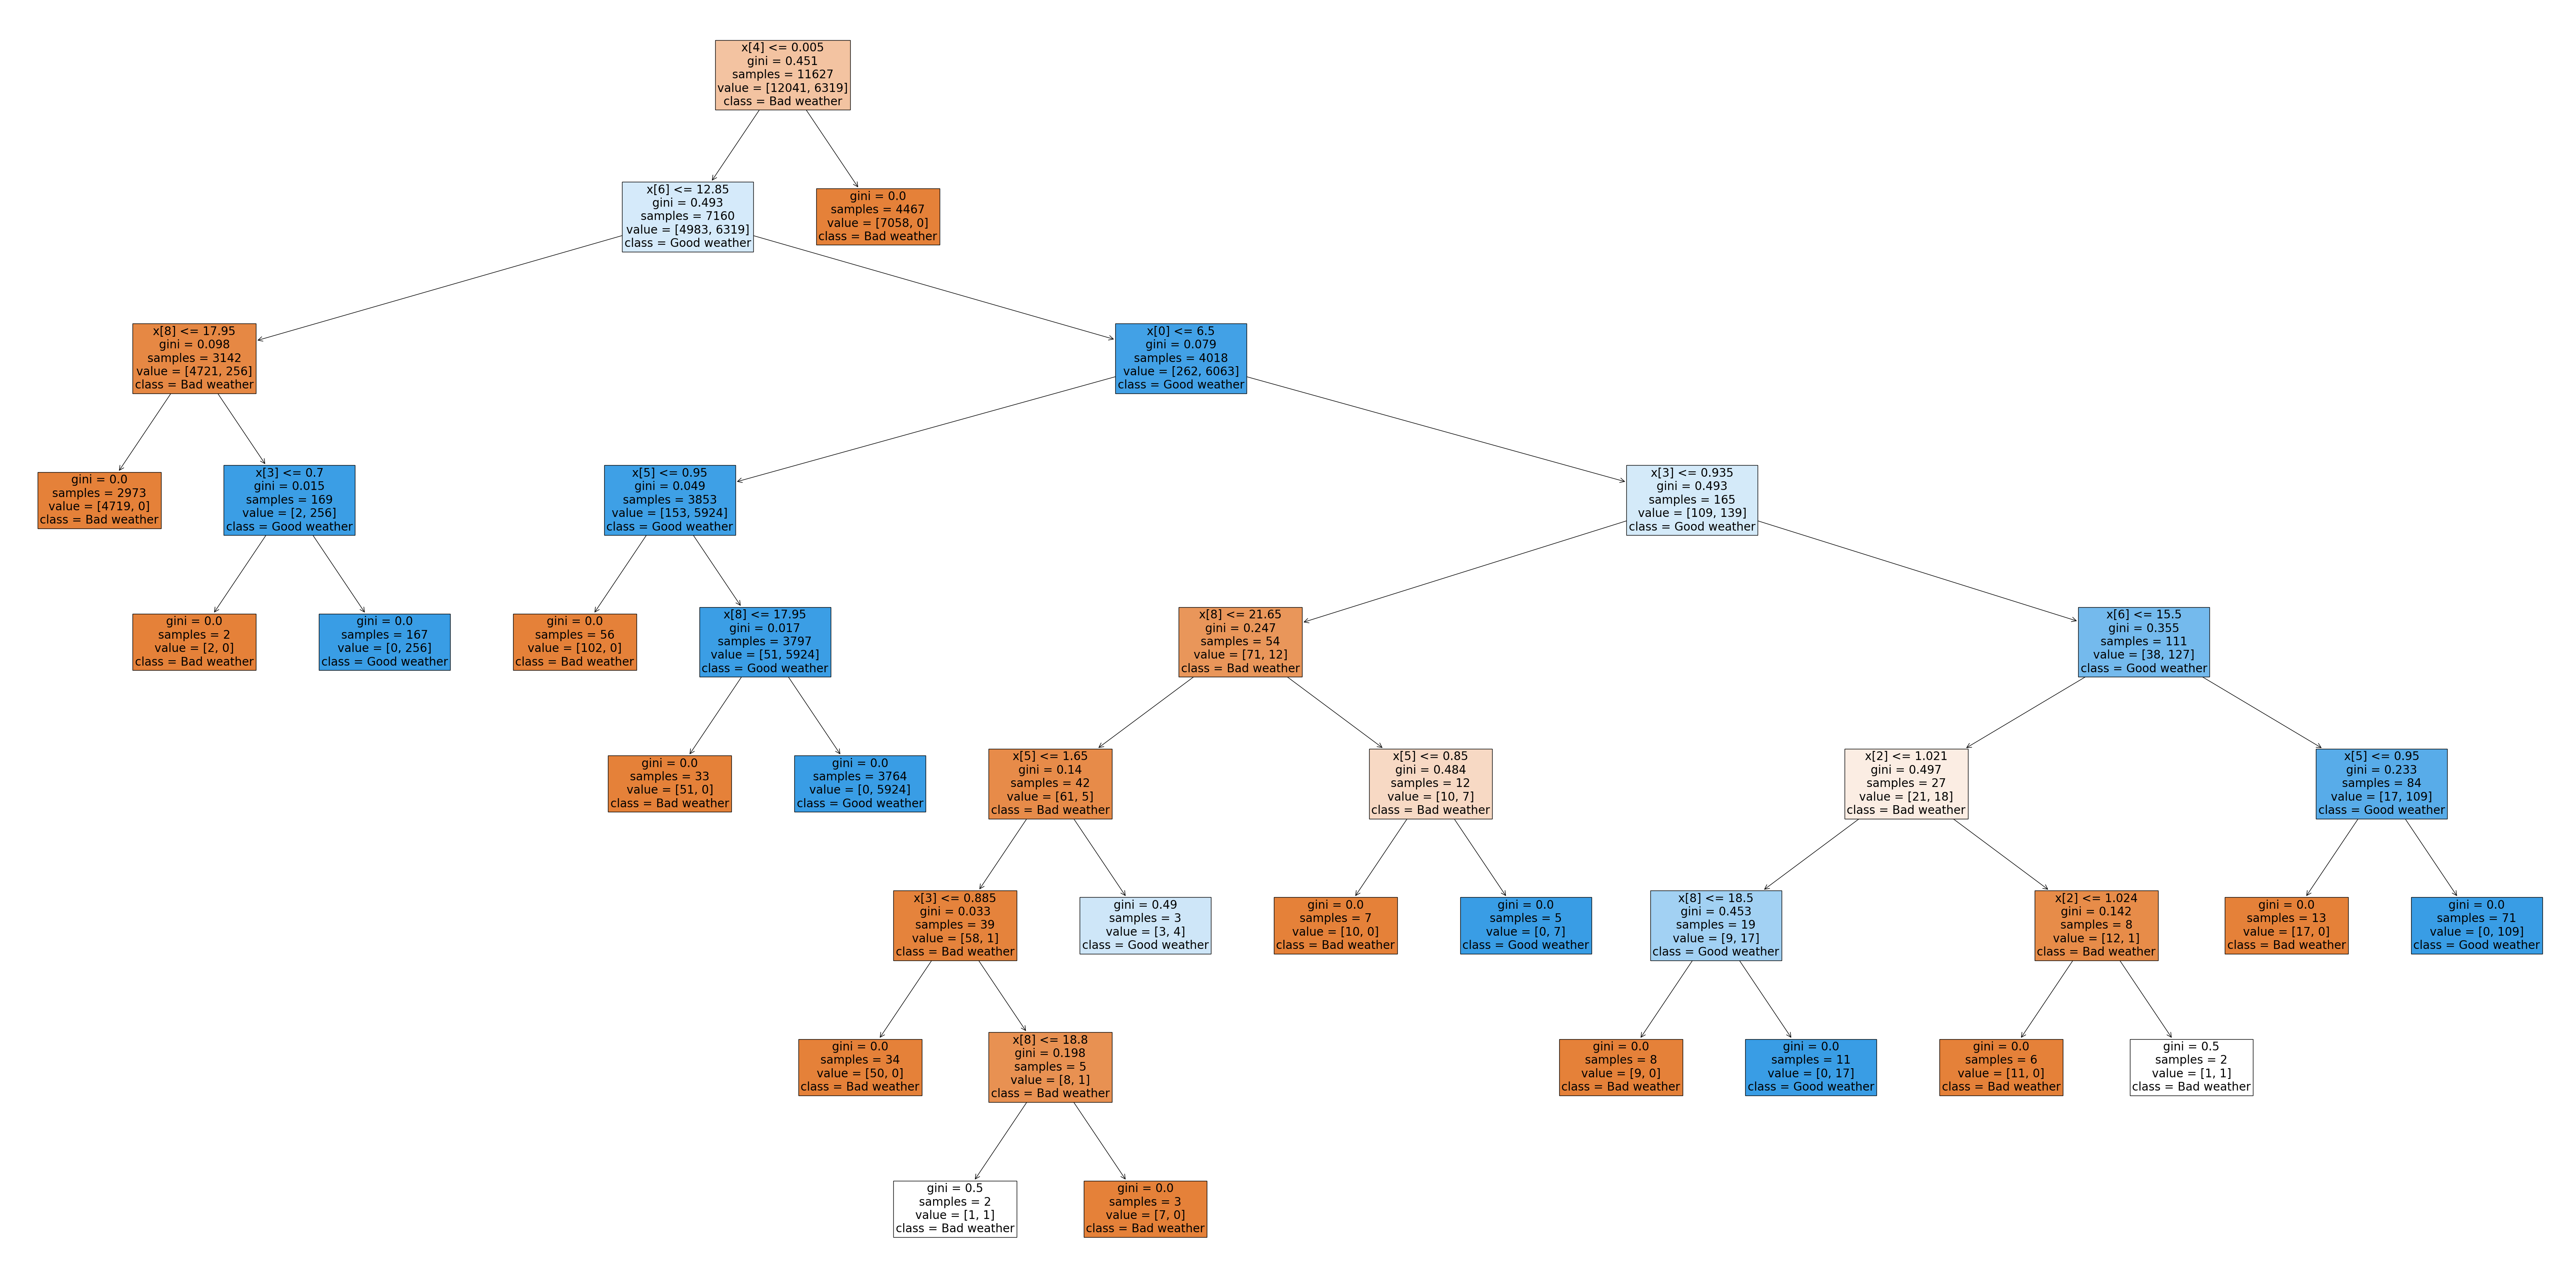

In [27]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=pred, filled=True)

In [28]:
fig.savefig(f"{path}/decision_tree_Belgrade.png")

In [35]:
np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.04009582, 0.00663866, 0.00566383, 0.01856335, 0.38239757,
       0.07359763, 0.13937519, 0.02606015, 0.30760781])

In [36]:
np.set_printoptions(threshold=1000)

In [39]:
measurements = ['BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max']

In [42]:
important = pd.Series(newarray, index = measurements) #.sort_values(ascending = False)
important

BELGRADE_cloud_cover         0.040096
BELGRADE_humidity            0.006639
BELGRADE_pressure            0.005664
BELGRADE_global_radiation    0.018563
BELGRADE_precipitation       0.382398
BELGRADE_sunshine            0.073598
BELGRADE_temp_mean           0.139375
BELGRADE_temp_min            0.026060
BELGRADE_temp_max            0.307608
dtype: float64

['BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max']


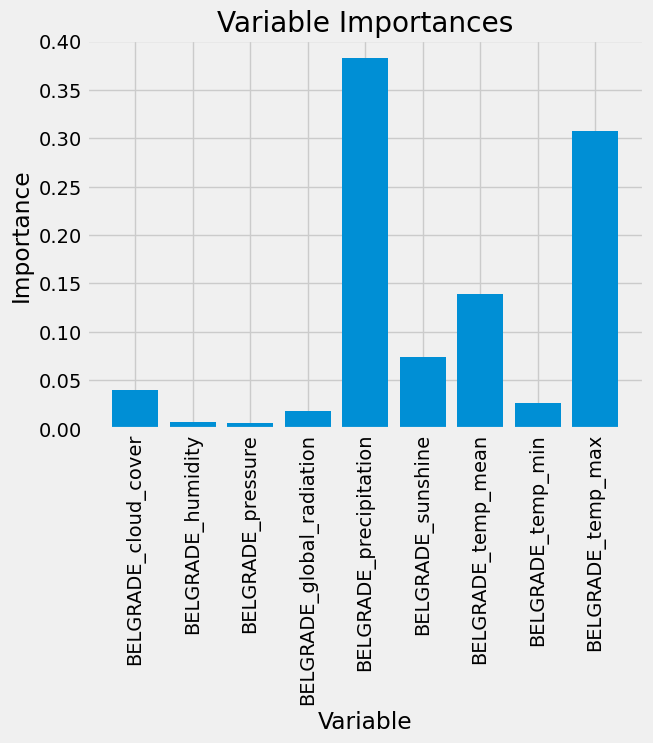

In [43]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(measurements)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, measurements, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#### This model shows that the most important variables, regarding the station of Belgrade, are: precipitation, temp max and temp mean.